# K-Means

In [1]:
%load_ext autoreload

We begin by loading necessary packages. 

In [9]:
%autoreload

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import k_means as km 

sns.set_style('darkgrid')

## [1] First Dataset

The first dataset is a simple problem that is well suited for K-Means. It consists of 500 datapoints ($x_0, x_1 \in \mathbb{R}$) that should be partitioned into two clusters.

### [1.1] Load Data

We begin by loading data from a .csv file located in the same folder as this notebook.

In [3]:
data_1 = pd.read_csv('data_1.csv')
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,500.0,0.487285,0.270455,0.009609,0.244733,0.403656,0.740552,0.987812
x1,500.0,0.500124,0.094661,0.177059,0.440589,0.500784,0.563798,0.814569


### [1.2] Visualize

Since the data is 2-dimensional, it lends itself nicely to visualization with a scatter plot. From this, it should be evident what a sensible clustering should look like.

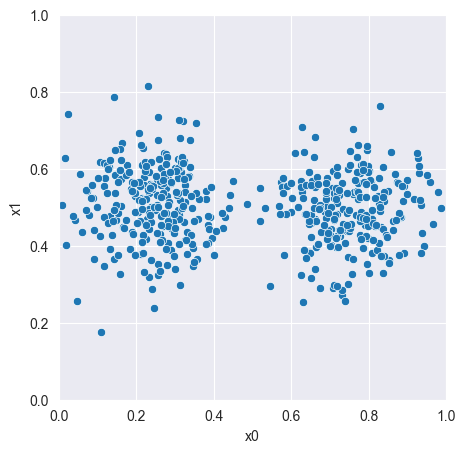

In [4]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_1)
plt.xlim(0, 1); plt.ylim(0, 1);

### [1.3] Fit and Evaluate

Next we fit and evaluate your K-Means clustering model over the dataset. We will quantitatively evaluate the solution according to _distortion_ and the _silhouette score_ (both assuming a euclidean distance metric).

- The distortion measure is equal to the sum of squared distances between each point and the centroid it is assigned to. It favors cohesive clusters, i.e. clusters where all points are close to their centroids, and is used as a minimization objective by K-Means.

- The [silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering) measures both cluster cohesion and separation. I.e., it also accounts for to what degree each cluster is isolated from other clusters. It takes on values in the range (-1, 1) and is subject to maximization.

Silhouette Score: 0.672
Distortion: 8.837


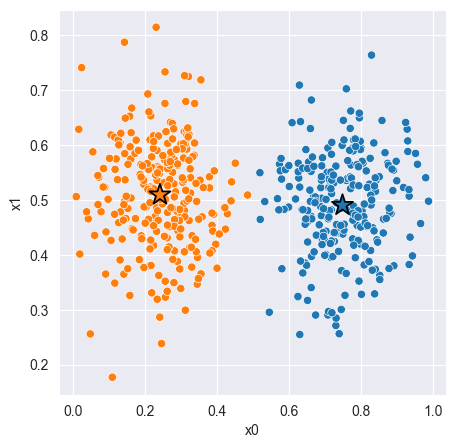

In [10]:
# Fit Model 
X = data_1[['x0', 'x1']]
model_1 = km.KMeans(plot_all = False, sample = "sample") # <-- Should work with default constructor  
model_1.fit(X)

# Compute Silhouette Score 
z = model_1.predict(X)
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')

# Plot cluster assignments
C = model_1.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();

## [2] Second Dataset

The second dataset is superficially similar to the first one. The goal is still to partition a two-dimensional dataset into mutually exlusive groups, but it is designed to be a bit more challenging.

### [2.1] Load Data

This dataset can also be found in a .csv file in the same folder as this notebook.

In [6]:
data_2 = pd.read_csv('data_2.csv')
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,1000.0,4.650079,3.264157,-1.467342,1.641665,4.577266,7.091304,10.848492
x1,1000.0,0.552630,0.331662,-0.146903,0.212082,0.636076,0.816686,1.120432


### [2.2] Visualize Data

As can be seen, there are substantially more clusters in this dataset. There is a total of 10 clusters the algorithm should be able to identify.

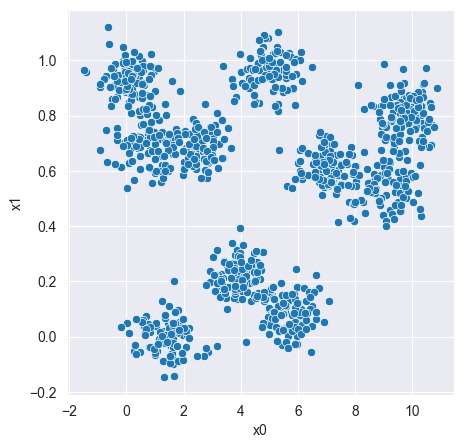

In [7]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_2);

### [2.3] Fit and Evaluate

Again, we fit the model to the data, measure distortion and silhouette score, and visualize the resulting clusters.

Distortion: 4.316
Silhouette Score: 0.566


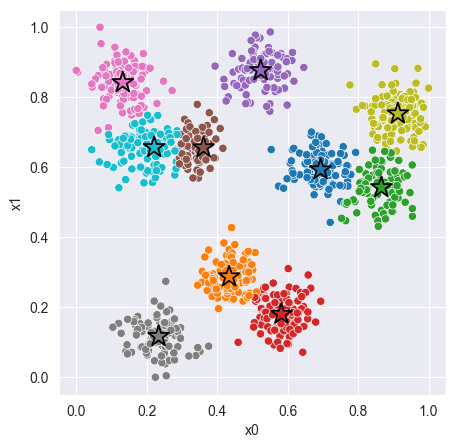

In [8]:
# Normelize the data 
from timeit import repeat


X = data_2[['x0', 'x1']]
X = (X-X.min())/(X.max()-X.min()) #Min-max normalization
# X=(X-X.mean())/X.std() #Mean nomralization

# Fit Model 
model_2 = km.KMeans(m_clusters = 10, n_rerolls = 5)  
model_2.fit(X)

# Compute Silhouette Score 
z = model_2.predict(X)
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')

# Plot cluster assignments
C = model_2.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();